<a href="https://colab.research.google.com/github/AlbertMdz/Optimizacion-Evolutiva/blob/master/NSGA_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Frente de pareto para la generación #  0  contiene a
0.613 

Frente de pareto para la generación #  1  contiene a
0.613 

Frente de pareto para la generación #  2  contiene a
2.73 0.613 

Frente de pareto para la generación #  3  contiene a
0.613 2.73 

Frente de pareto para la generación #  4  contiene a
2.73 0.613 

Frente de pareto para la generación #  5  contiene a
0.613 2.73 

Frente de pareto para la generación #  6  contiene a
0.246 0.613 2.73 

Frente de pareto para la generación #  7  contiene a
2.726 0.246 0.613 

Frente de pareto para la generación #  8  contiene a
0.613 2.726 0.246 

Frente de pareto para la generación #  9  contiene a
1.607 0.613 0.246 

Frente de pareto para la generación #  10  contiene a
0.246 1.607 0.613 

Frente de pareto para la generación #  11  contiene a
0.613 0.246 1.607 

Frente de pareto para la generación #  12  contiene a
1.65 0.613 0.246 -0.038 1.607 

Frente de pareto para la generación #  13  contiene a
1.607 1.65 0.613 -0.038 0.246 

Fre

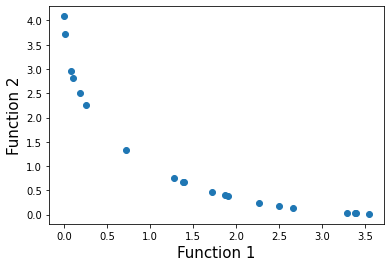

In [5]:
import math
import random
import matplotlib.pyplot as plt

def function1(x):
    value = -x**2
    return value

def function2(x):
    value = -(x-2)**2
    return value

def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list

def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_x+(max_x-min_x)*random.random()
    return solution
#valores
pop_size = 20
max_gen = 901
min_x=-55
max_x=55
solution=[min_x+(max_x-min_x)*random.random() for i in range(0,pop_size)]
gen_no=0
while(gen_no<max_gen):
    function1_values = [function1(solution[i])for i in range(0,pop_size)]
    function2_values = [function2(solution[i])for i in range(0,pop_size)]
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])
    print("Frente de pareto para la generación # ",gen_no, " contiene a")
    for valuez in non_dominated_sorted_solution[0]:
        print(round(solution[valuez],3),end=" ")
    print("\n")
    crowding_distance_values=[]
    for i in range(0,len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))
    solution2 = solution[:]   
    while(len(solution2)!=2*pop_size):
        a1 = random.randint(0,pop_size-1)
        b1 = random.randint(0,pop_size-1)
        solution2.append(crossover(solution[a1],solution[b1]))
    function1_values2 = [function1(solution2[i])for i in range(0,2*pop_size)]
    function2_values2 = [function2(solution2[i])for i in range(0,2*pop_size)]
    non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
    crowding_distance_values2=[]
    for i in range(0,len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))
    new_solution= []
    for i in range(0,len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if(len(new_solution)==pop_size):
                break
        if (len(new_solution) == pop_size):
            break
    solution = [solution2[i] for i in new_solution]
    gen_no = gen_no + 1

#Plot
function1 = [i * -1 for i in function1_values]
function2 = [j * -1 for j in function2_values]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()